# Introduction
We will use the SVM (Support Vector Machine) algorithm using the Breast Cancer dataset. We'll demonstrate the difference between soft and hard margin SVM and show how the regularization parameter (C) affects the classification results. We'll print the results of the classification and visualize the accuracy vs hyperparameter (C) at the end for comparison.

# Logistic Regression

## Overview
**Logistic Regression** is a supervised learning algorithm used for binary classification tasks. Unlike linear regression, which is used for continuous outcomes, logistic regression predicts the probability of a binary outcome (i.e., one of two possible classes). Logistic regression models the probability that a given input belongs to a certain class using the **logistic (sigmoid) function**.

## Logistic Function (Sigmoid Function)
The logistic function maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability. The logistic function is given by:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- \( z = w \cdot x + b \) is the linear combination of input features.
- \( w \) is the weight vector.
- \( b \) is the bias term.
- \( \sigma(z) \) is the predicted probability that the input belongs to the positive class (class 1).

### Decision Boundary
Logistic regression uses the logistic function to predict probabilities. If the predicted probability \( P(y=1|x) \) is greater than 0.5, the data point is classified as class 1 (positive class), otherwise it is classified as class 0 (negative class).

### Log-Odds and Logistic Regression
The model can be interpreted in terms of **log-odds**. The log-odds of the probability \( P(y=1|x) \) is a linear function of the input features:

$$
\log\left(\frac{P(y=1|x)}{1 - P(y=1|x)}\right) = w \cdot x + b
$$

This linear relationship in log-odds allows us to model the probabilities in a classification setting.

## Cost Function (Log Loss)
In logistic regression, the goal is to find the optimal weights \( w \) and bias \( b \) that minimize the difference between the predicted probabilities and the actual labels. The cost function used is the **logistic loss (log loss)**, which is given by:

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h_w(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_w(x^{(i)})) \right]
$$

Where:
- \( m \) is the number of training examples.
- \( y^{(i)} \) is the actual label for the \(i\)-th training example.
- \( h_w(x^{(i)}) = \sigma(w \cdot x^{(i)} + b) \) is the predicted probability for the \(i\)-th example.
  
Minimizing the cost function results in the best-fit weights for predicting the probability of the positive class.

## Gradient Descent
Logistic regression typically uses **gradient descent** to minimize the cost function. Gradient descent updates the weights by moving in the direction of the negative gradient of the cost function:

$$
w := w - \alpha \frac{\partial J(w)}{\partial w}
$$

Where:
- \( \alpha \) is the learning rate.
- \( \frac{\partial J(w)}{\partial w} \) is the gradient of the cost function with respect to the weights.

## Regularization
To prevent overfitting, logistic regression can include regularization terms. Two common types of regularization are:
1. **L2 Regularization (Ridge)**:
   $$ J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h_w(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_w(x^{(i)})) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2 $$
   
   This penalizes large weights and helps prevent overfitting by shrinking the weights.
   
2. **L1 Regularization (Lasso)**:
   $$ J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h_w(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_w(x^{(i)})) \right] + \frac{\lambda}{m} \sum_{j=1}^{n} |w_j| $$

   L1 regularization can lead to sparse models, where some feature weights are reduced to zero.

## Multiclass Classification (One-vs-Rest)
Although logistic regression is primarily used for binary classification, it can be extended to handle multiclass classification through the **One-vs-Rest (OvR)** approach. In OvR, a separate binary classifier is trained for each class, and the class with the highest probability is selected.

## Advantages of Logistic Regression
- **Interpretable**: The output probabilities and model coefficients are easily interpretable.
- **Efficient**: Logistic regression is computationally efficient, even on large datasets.
- **Works well with linearly separable data**: Logistic regression performs well when the data is linearly separable or close to linearly separable.

## Limitations of Logistic Regression
- **Limited to linear decision boundaries**: Logistic regression only works well when the relationship between the features and the target is approximately linear.
- **Sensitive to outliers**: Logistic regression can be sensitive to outliers, especially if regularization is not used.




# Setup
Import necessary librairies and load the Breast Cancer dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets

In [2]:
# Split the data into training and test sets (80% training, 20% test)
# random_state is set to 42 to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train SVM models with different regularization parameters (C).

In [3]:
# Create a list of regularization parameter values
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create an empty dictionary to store the results
results = {}

# Train Logistic Regression models with different C values
for C in C_values:
    lr_model = LogisticRegression(C=C, random_state=42, max_iter=2000)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[C] = {
        'model': lr_model,
        'accuracy': accuracy
    }


d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\envs\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Print the results of the classification.

In [4]:
# Print the results of the classification
print("Results of Logistic Regression Classification:")
for C, result in results.items():
    print(f"C = {C}, Accuracy: {result['accuracy']:.4f}")


Results of Logistic Regression Classification:
C = 0.001, Accuracy: 0.9649
C = 0.01, Accuracy: 0.9649
C = 0.1, Accuracy: 0.9649
C = 1, Accuracy: 0.9561
C = 10, Accuracy: 0.9561
C = 100, Accuracy: 0.9561
C = 1000, Accuracy: 0.9649


# Visualize the accuracy vs regularization parameter (C) for comparaison.

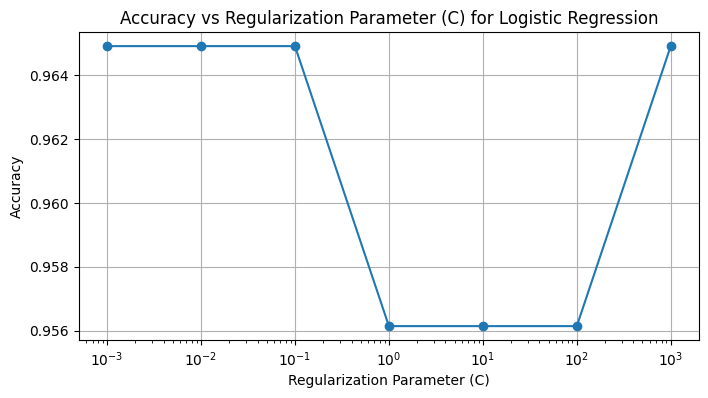

In [5]:
# Visualize the accuracy vs regularization parameter (C)
accuracies = [result['accuracy'] for C, result in results.items()]

plt.figure(figsize=(8, 4))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Parameter (C) for Logistic Regression')
plt.grid(True)
plt.show()

# Conclusion

This tutorial covers the Logistic Regression algorithm using the Breast Cancer dataset. It demonstrates how to create and train the Logistic Regression model for classification and prints the accuracy of the model with different values of the regularization parameter (C). The tutorial also visualizes the accuracy vs regularization parameter (C) for comparison.

* C controls the regularization strength in logistic regression.
* Large C: Weaker regularization, model tries to fit the data as accurately as possible (higher risk of overfitting).
* Small C: Stronger regularization, model becomes simpler and avoids overfitting (higher risk of underfitting).
